In [1]:
from pathlib import Path

import numpy as np
from matplotlib import pyplot as plt

import lsstypes as types
from check_covariance import get_measurement_fn

plot_dir = Path('_plots')
plot_dir.mkdir(exist_ok=True)

ext = 'png'
tracers = [('LRG', (0.4, 0.6))]


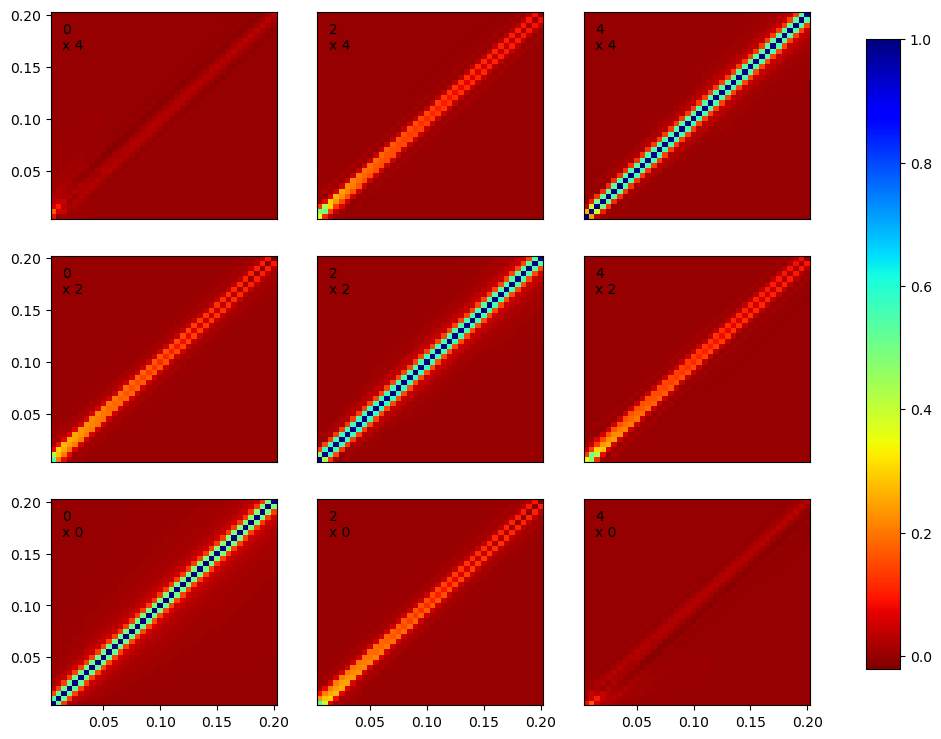

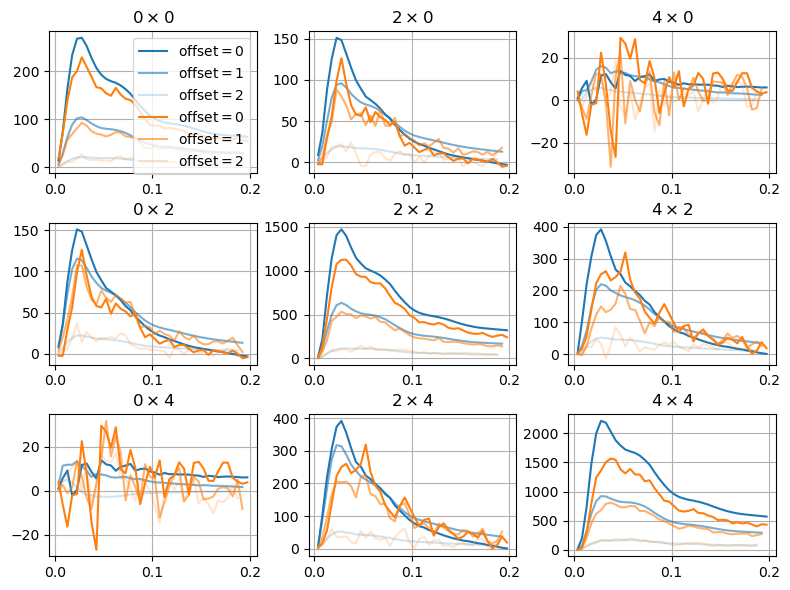

In [5]:
for tracer, zrange in tracers:
    catalog_args = dict(tracer=tracer, zrange=zrange, region='NGC')
    fn = get_measurement_fn(kind='covariance_mocks_mesh2_spectrum_poles', **catalog_args)
    cov_mocks = types.read(fn).at.observable.select(k=slice(0, None, 5)).at.observable.select(k=(0., 0.2))  # rebin
    #cov_mocks.plot(corrcoef=True, show=True);

    for name in ['WW', 'WS', 'SS'][:0]:
        fn = get_measurement_fn(kind=f'{name}_covariance_analytic_mesh2_spectrum_poles', **catalog_args)
        window = types.read(fn).get(fields=(0, 0, 0, 0))
        ax = plt.gca()
        for ell in window.ells:
            pole = window.get(ell)
            ax.plot(pole.coords('s'), pole.value(), label=str(ell))
        ax.set_xlabel('$s$')
        ax.set_xscale('log')
        plt.show()

    fn = get_measurement_fn(kind='covariance_analytic_mesh2_spectrum_poles', **catalog_args)
    cov_analytic = types.read(fn)

    cov_analytic = cov_analytic.at.observable.match(cov_mocks.observable)  # rebin analytic covariance matrix
    cov_analytic.plot(corrcoef=True, show=True);
    kw = dict(ytransform=lambda x, y: x**3 * y, offset=np.arange(3))
    fn = plot_dir / f'comparison_covariance_{tracer}_z{zrange[0]:.1f}-{zrange[1]:.1f}.{ext}'
    fig = cov_analytic.plot_diag(color='C0', **kw)
    cov_mocks.plot_diag(fig=fig, color='C1', **kw, fn=fn)